In [27]:
import os
import numpy as np
import pandas as pd
if not os.getcwd().endswith('assignment2'):
    os.chdir(os.path.join('Unit2', 'assignment2'))
statedata = pd.read_csv('statedata.csv')

In [54]:
%matplotlib inline 
import seaborn as sns
sns.set_style("darkgrid")

In [62]:
statedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
Population        50 non-null int64
Income            50 non-null int64
Illiteracy        50 non-null float64
Life.Exp          50 non-null float64
Murder            50 non-null float64
HS.Grad           50 non-null float64
Frost             50 non-null int64
Area              50 non-null int64
state.abb         50 non-null object
state.area        50 non-null int64
x                 50 non-null float64
y                 50 non-null float64
state.division    50 non-null object
state.name        50 non-null object
state.region      50 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 5.9+ KB


### Problem 1.2 
Plot the x vs y coordiates of the state's center (should somewhat resemble a map).

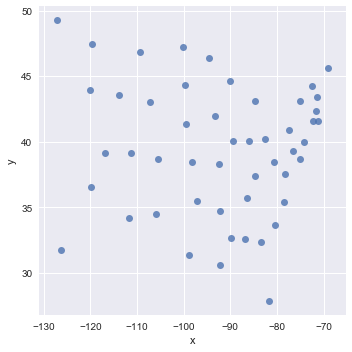

In [61]:
ax = sns.lmplot(x="x", y="y", data=statedata, fit_reg=False)

### Problem 1.2 
which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region


In [66]:
statedata.groupby(['state.region'])['HS.Grad'].mean()

state.region
North Central    54.516667
Northeast        53.966667
South            44.343750
West             62.000000
Name: HS.Grad, dtype: float64

### Problem 1.3
Create a box plot of the murder rate by region. Which has the highes median murder rate?

Let's first look at the statistics, without the box plot:

In [67]:
statedata.groupby(['state.region'])['Murder'].median()

state.region
North Central     3.75
Northeast         3.30
South            10.85
West              6.80
Name: Murder, dtype: float64

The south obviously has the highest meadian murder rate. Now let's make a box plot

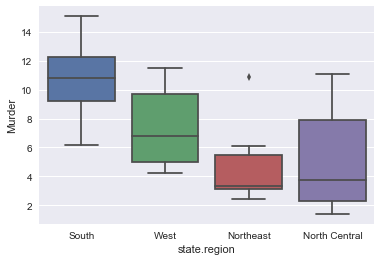

In [72]:
sns.boxplot(x="state.region", y="Murder", data=statedata)

### Problem 1.4
Which state corresponds to the outlier in the box plot?

In [173]:
northeast_states = statedata[statedata['state.region'] == 'Northeast']
northeast_states.loc[northeast_states['Murder'].idxmax()]['state.name']

'New York'

## Section 2
### Problem 2.1
Make a linear model for predicting life expectancy using Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area. What is the coefficient for "Income" ?

In [174]:
from sklearn.linear_model import LinearRegression as lreg

Prepare the data for Scikit

In [267]:
life_exp = statedata['Life.Exp'].values.reshape(-1, 1)
descriptors_list1 = ['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area']
descriptors = statedata[descriptors_list1].values

In [268]:
lexp_mod1 = lreg().fit(X=descriptors, y=life_exp)

To see the coefficient of income, let's look at the second coefficient:

In [269]:
lexp_mod1.coef_[0, 1]

-2.1804237825303935e-05

## Problem 2.2
This is a Qualitative question. Will not be answered here.  

## Problem 2.3
By plotting life expectancy vs. income, what is the relationship between them?

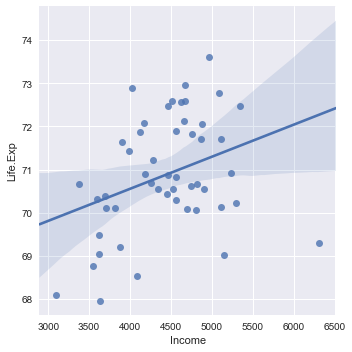

In [386]:
ax = sns.lmplot(x="Income", y="Life.Exp", data=statedata)

Life expectancy seem to be positivley correlated with income.
## Section 3
### Problem 3.1


In [271]:
from sklearn.feature_selection import f_regression, f_classif, mutual_info_regression, RFE

We will use the "recursive feature elimination" or RFE from scikit learn, to obtain the important features:

In [272]:
selector = RFE(lexp_mod1, n_features_to_select=4)
life_exp[:, 0]
selector = selector.fit(X=descriptors, y=life_exp[:, 0])
np.array(descriptors_list1)[selector.support_]

array(['Illiteracy', 'Murder', 'HS.Grad', 'Frost'], 
      dtype='<U10')

Which seems to not agree with the official solution of "Population, Murder, Frost, HS.Grad". Just to make sure, we will also use the "Univariate linear regression test" which agrees with previous determination. 

In [273]:
f_regression(X=descriptors, y=life_exp[:, 0])

(array([  0.22332551,   6.28474562,  25.42888224,  74.98865153,
         24.61457799,   3.53973023,   0.55941143]),
 array([  6.38659369e-01,   1.56172816e-02,   6.96925047e-06,
          2.26007029e-11,   9.19609565e-06,   6.59874037e-02,
          4.58146418e-01]))

It's interesting to see which model is better.

In [384]:
edx_vars = ['Population', 'Murder', 'Frost', 'HS.Grad']
skl_vars = ['Illiteracy', 'Murder', 'Frost', 'HS.Grad']

edx_descriptors = statedata[edx_vars].values
skl_descriptors = statedata[skl_vars].values

edx_reg_mod = lreg().fit(X=edx_descriptors, y=life_exp)
skl_reg_mod = lreg().fit(X=skl_descriptors, y=life_exp)

 Let's compare the quality of predictions:

In [385]:
edx_reg_score = edx_reg_mod.score(X=edx_descriptors, y=life_exp)
skl_reg_score = skl_reg_mod.score(X=skl_descriptors, y=life_exp)
print('R2 for edx: {:0.2f}, for skl: {:0.2f}'.format(edx_reg_score, skl_reg_score))

R2 for edx: 0.74, for skl: 0.71


edx ($R^2 = 0.74$) is slightly better the skl ($R^2 = 0.71$), however, it's probably due to the write's poor knowledge of the subject.

### Problem 3.2
Qualitative question. Not answered here.

### Problem 3.3
Predict the country of least life expectancy

In [286]:
edx_min_index = edx_reg_mod.predict(X=edx_descriptors).argmin()
statedata.loc[edx_min_index]['state.name']

'Alabama'

In [289]:
skl_min_index = skl_reg_mod.predict(X=skl_descriptors).argmin()
statedata.loc[skl_min_index]['state.name']

'Alabama'

The country of actucal least life expectancy

In [285]:
statedata.loc[statedata['Life.Exp'].idxmin()]['state.name']

'South Carolina'

### Problem 3.4
State with highest life expectancy

In [337]:
edx_max_index = edx_reg_mod.predict(X=edx_descriptors).argmax()
statedata.loc[edx_max_index]['state.name']

'Washington'

In [354]:
skl_max_index = skl_reg_mod.predict(X=skl_descriptors).argmax()
statedata.loc[skl_max_index]['state.name']

'Washington'

In [355]:
statedata.loc[statedata['Life.Exp'].idxmax()]['state.name']

'Hawaii'

As an exercise in computational efficiency, let us find the **two** countries predicted to have highest life expectancy.

In [358]:
edx_predictions = edx_reg_mod.predict(X=edx_descriptors)[:, 0]
two_largest_indexes = np.argpartition(edx_predictions, -2)[-2:]
statedata.loc[two_largest_indexes]['state.name']

20    Massachusetts
46       Washington
Name: state.name, dtype: object

### Problem 3.5
For which state the prediction is most and least accurate?

The maximum error:

In [387]:
max_error = ((statedata['Life.Exp'].values - edx_predictions)**2).argmax()
statedata.loc[max_error]['state.name']

'Hawaii'

The minimal error:

In [388]:
min_error = ((statedata['Life.Exp'].values - edx_predictions)**2).argmin()
statedata.loc[min_error]['state.name']

'Indiana'